School Data Visualization Project

In [1]:
#importing required libraries

import pickle
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
class SchoolApplication:
  def __init__(self, date, name, school, type, rating, tuition_fee, acceptance_rate):
    self.date = date
    self.name = name
    self.school = school
    self.type = type
    self.rating = rating
    self.tuition_fee = tuition_fee
    self.acceptance_rate = acceptance_rate
    self.unique_id = id(self)

  def __str__(self):
    return (str(self.unique_id)+","+str(self.date)+","+str(self.name)+","+str(self.school)+","+str(self.type)+","
            +str(self.rating)+","+str(self.tuition_fee)+","+str(self.acceptance_rate))


class StemSchoolApplication(SchoolApplication):
  def __init__(self, date, name, school, rating, tuition_fee, acceptance_rate):
    super().__init__(date, name, school, "Stem" ,rating, tuition_fee, acceptance_rate)

class NonStemSchoolApplication(SchoolApplication):
  def __init__(self, date, name, school, rating, tuition_fee, acceptance_rate):
    super().__init__(date, name, school, "non-Stem" ,rating, tuition_fee, acceptance_rate)


class Caltech(StemSchoolApplication):
  def __init__(self, date, name, rating, tuition_fee, acceptance_rate):
    super().__init__(date, name, "Caltech", rating, tuition_fee, acceptance_rate)

class Wharton(NonStemSchoolApplication):
  def __init__(self, date, name, rating, tuition_fee, acceptance_rate):
    super().__init__(date, name, "Wharton", rating, tuition_fee, acceptance_rate)

class Yale(NonStemSchoolApplication):
  def __init__(self, date, name, rating, tuition_fee, acceptance_rate):
    super().__init__(date, name, "Yale", rating, tuition_fee, acceptance_rate)
    
#Testing classes
WhartonSchoolApplication = Wharton("2022-11-15","nameA", 2, 641, 86.06)
print(str(WhartonSchoolApplication))

5753408656,2022-11-15,nameA,Wharton,non-Stem,2,641,86.06


In [3]:
#loading pickle file

with open('SchoolApplicationpkl50103.dat', 'rb') as fb:
    try:
        while (True):
            objects = pickle.load(fb)
    except EOFError:
        pass

#writing objects to csv

with open('data.csv', 'w') as f: 
    f.write("uniqueId,date,name,school,type,rating,tuition_fee,acceptance_rate\n") 
    for obj in objects:
        f.write(str(obj)+'\n')

In [12]:
#checking missing values 

school_data = pd.read_csv("data.csv")
school_data.isna().sum()

uniqueId             0
date               472
name                 0
school               0
type                 0
rating             411
tuition_fee        453
acceptance_rate    439
dtype: int64

In [18]:
school_data.info()
school_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uniqueId         10000 non-null  int64  
 1   date             9528 non-null   object 
 2   name             10000 non-null  object 
 3   school           10000 non-null  object 
 4   type             10000 non-null  object 
 5   rating           9589 non-null   float64
 6   tuition_fee      9547 non-null   float64
 7   acceptance_rate  9561 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 625.1+ KB


,uniqueId,rating,tuition_fee,acceptance_rate
count,1.000000e+04,9589.000000,9547.000000,9561.000000
mean,1.342893e+14,4.013766,18721.914633,90.041397
std,1.805571e+08,0.868382,2880.905555,7.685673
min,1.342893e+14,1.000000,15000.000000,61.800000
25%,1.342893e+14,3.000000,16381.000000,85.300000
50%,1.342893e+14,4.000000,18048.000000,91.720000
75%,1.342893e+14,5.000000,20545.500000,96.330000
max,1.342905e+14,5.000000,29117.000000,100.000000


In [16]:
#percentage of null values 

school_data.isnull().sum().sum()/school_data.size*100

2.21875

In [25]:
#filling missing columns 
# we can see rating is ordinal, hence we can impute a median or mode of the values 
# tuition_fee is random between 15000 and 29117 with mean about 18691.38
# acceptance_rate is a value between 61.80 and 100 with mean about 90.11
# hence taking median values for rating, tuition_fee, acceptance_rate and using mode value for date

cols = ['rating', 'tuition_fee', 'acceptance_rate']

for column in cols:
    print(column+": "+str(school_data[column].median()))
    school_data[column].fillna(school_data[column].median(), inplace=True)

print('date: '+str(school_data['date'].mode()[0]))    
school_data['date'].fillna(school_data['date'].mode()[0], inplace=True)

school_data.isna().sum()

rating: 4.0
tuition_fee: 18048.0
acceptance_rate: 91.72
date: 2022-01-03


uniqueId           0
date               0
name               0
school             0
type               0
rating             0
tuition_fee        0
acceptance_rate    0
dtype: int64

# INTRODUCTION 

Data about SchoolApplications of candidates from an aggregator website
Data size of 10000
8 Columns (uniqueId,date,name,school,type,rating,tuition_fee,acceptance_rate)
rating, tuition_fee, acceptance_rate are numerical data fields whereas date, name, school, type are categorical data fields
Unique_id is a identifier fields and hence can be ignored from the visualization.
Upon investigation of data, we found that missing values comprised of 2.21875% dataset.
We filled the missing data of ‘rating’, ‘tuition_fee’ and ‘acceptance_rate’ columns by using median of each column.
The missing data of date was filled by using mode of the column.

# DATA VISUALIZATION 

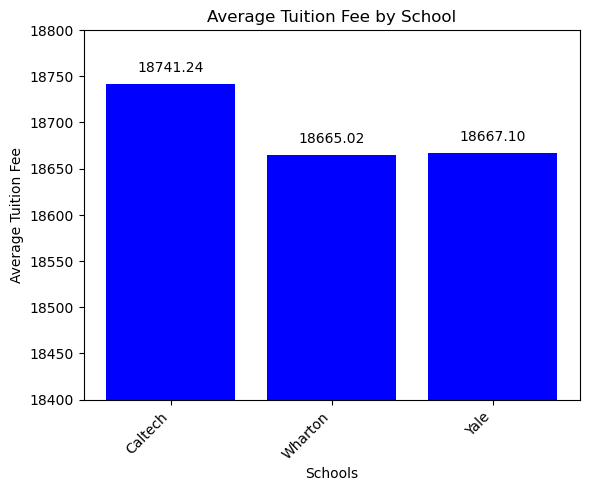

In [86]:
average_tuition = school_data.groupby('school')['tuition_fee'].mean().reset_index() 
plt.bar(average_tuition['school'], average_tuition['tuition_fee'], color='blue') 
for i, value in enumerate(average_tuition['tuition_fee']):     
    plt.text(i, value + 10, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Schools') 
plt.ylabel('Average Tuition Fee') 
plt.title('Average Tuition Fee by School') 
plt.xticks(rotation=45, ha='right')  
plt.ylim(18400, 18800)
plt.show()

The bar chart represents the average tuition fees of applicants at each school which provides us with the information that the average tuition fees of caltech is higher than average tuition fees of wharton and yale by 4%.
whereas the average tuition fees of wharton and yale are similar where yale is greater by 0.01%

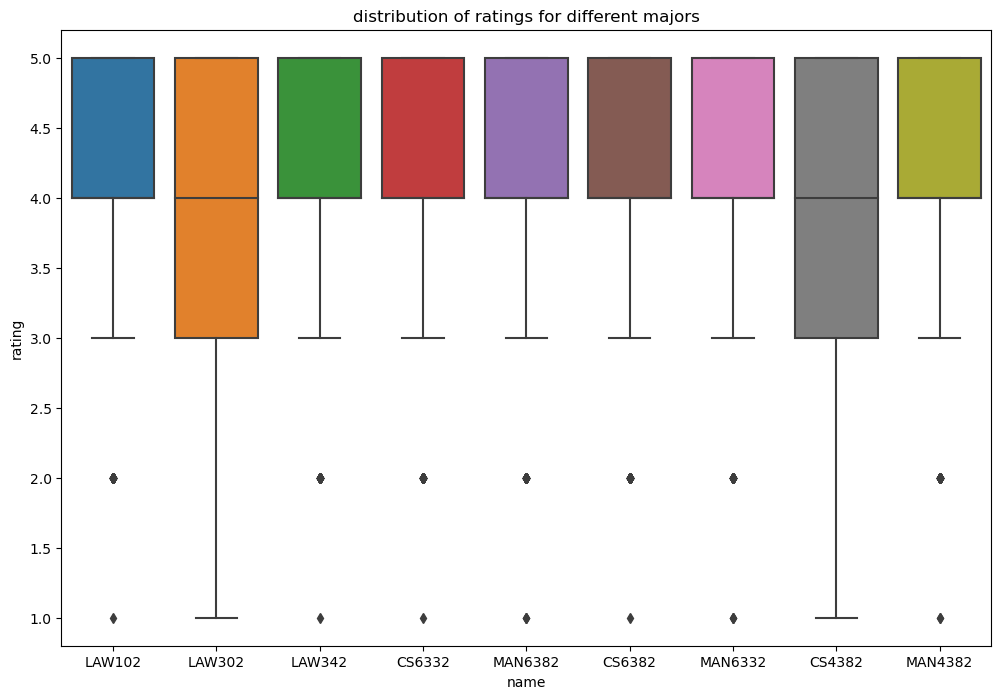

In [121]:
plt.figure(figsize=(12, 8))
seaborn.boxplot(x='name', y='rating', data=school_data)
plt.title('distribution of ratings for different majors')
plt.show()

The boxplot represents the distribution of ratings for different majors. which provides us with the information that the interquartile range for all the majors except LAW302 and CS4382 are between 4.0 and 5.0 whereas for the remaining majors its between 3.0 and 5.0. 

We can also observe that the minimum and maximum values for all the majors except LAW302 and CS4382 are 3.0 and 5.0 whereas for the remaining two majors it is 1.0 and 5.0.

We also get the information that the median value of all the majors is 4.0

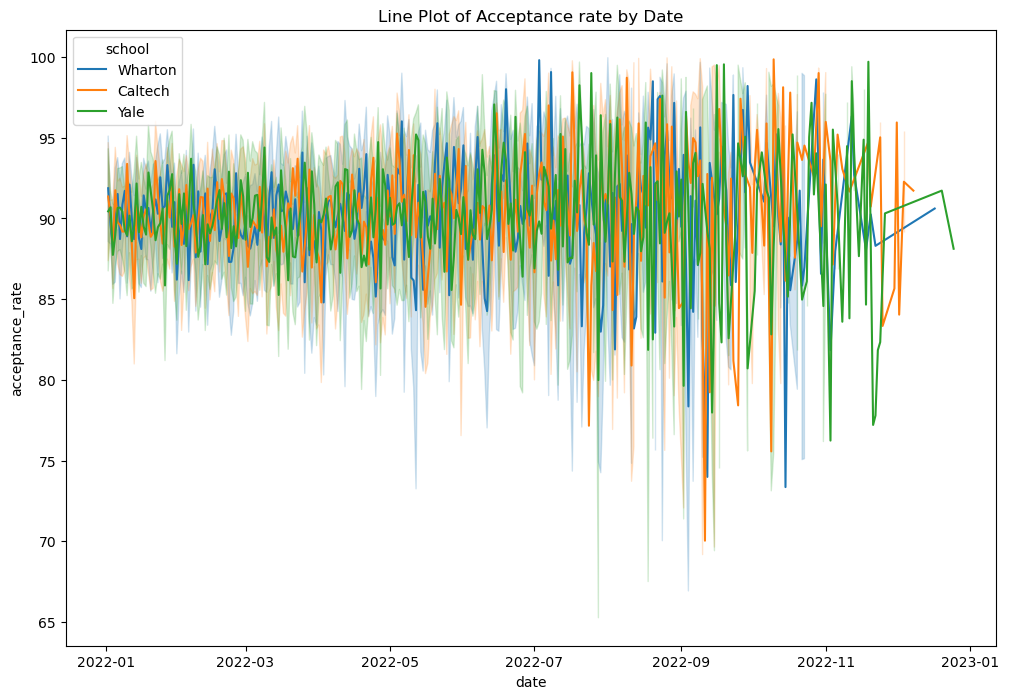

In [88]:
school_data['date'] = pd.to_datetime(school_data['date']) 
plt.figure(figsize=(12, 8))
seaborn.lineplot(x='date', y='acceptance_rate', hue='school', data=school_data)
plt.title('Line Plot of Acceptance rate by Date')
plt.show()

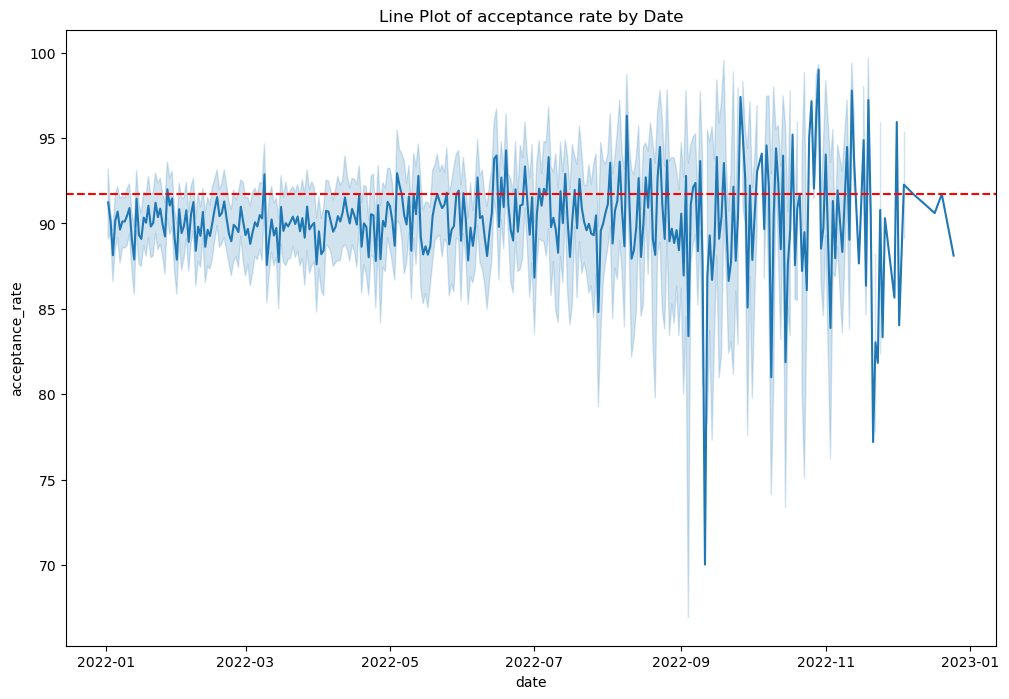

In [89]:
school_data['date'] = pd.to_datetime(school_data['date'])
plt.figure(figsize=(12, 8))
seaborn.lineplot(x='date', y='acceptance_rate', data=school_data)
median_value = school_data['acceptance_rate'].median() 
plt.axhline(y=median_value, color='red', linestyle='--', label='Median')
plt.title('Line Plot of acceptance rate by Date')
plt.show()

Line chart illustrates acceptance rate variation over application dates which provides us with the information that Acceptance rate ranges from 85 to 95 between January 2022 and July 2022, subsequent months show greater variation, fluctuating between 70 and 100. 

We can also observe the Lowest acceptance rate is recorded in September 2022 at around 70, while the highest is around 100 in November 2022.

We also get the information that the median acceptance rate is around 92 from the above visualization. 

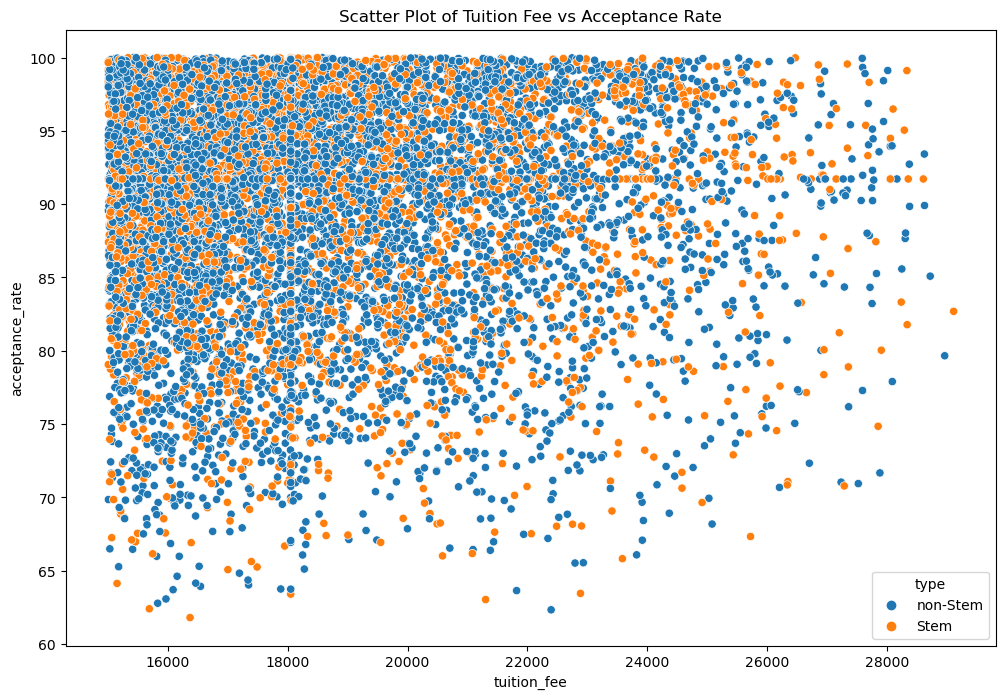

In [108]:
plt.figure(figsize=(12, 8))
seaborn.scatterplot(x='tuition_fee', y='acceptance_rate',hue='type', data=school_data)
plt.title('Scatter Plot of Tuition Fee vs Acceptance Rate')
plt.show()

Scatter plot illustrates acceptance rate distribution based on tuition fees which provides us with the information that the acceptance rate seems to be higher for the majors whose tution fees is between 16000 and 22000, which gives us that Lower tuition fees correlate with higher acceptance rates, indicating an inverse relationship. 

We can also observe that the tuition fees for majority of the majors lie between 16000 and 22000.

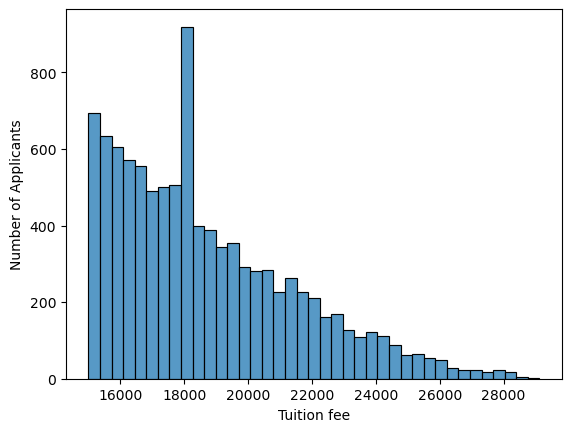

In [120]:
seaborn.histplot(school_data.tuition_fee)
plt.xlabel('Tuition fee')
plt.ylabel('Number of Applicants')
plt.show()

The above Histogram illustrates applicant distribution by tuition fees which provides us with the information that tuition fees for the majority of majors are around 18000.

Inverse relationship is observed between tuition fees and the count of students offered in each fee category​

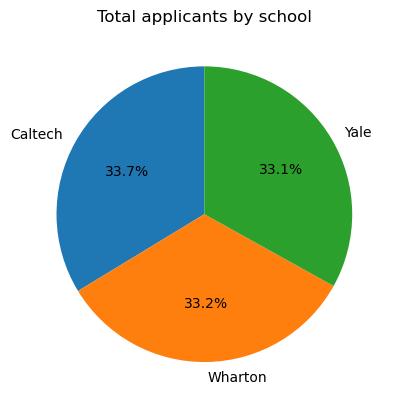

In [33]:
total_applicants = school_data.groupby('school')['uniqueId'].sum()
plt.pie(total_applicants, labels=total_applicants.index, autopct='%1.1f%%', startangle=90)
plt.title('Total applicants by school')
plt.show()

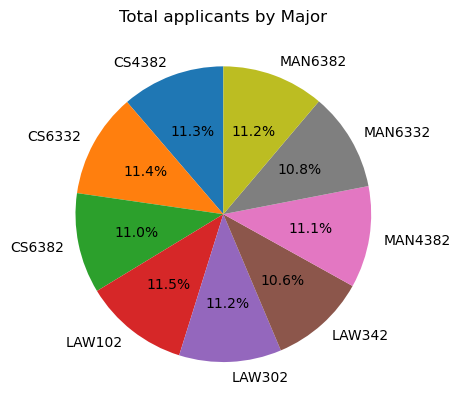

In [119]:
total_applicants = school_data.groupby('name')['uniqueId'].sum()
plt.pie(total_applicants, labels=total_applicants.index, autopct='%1.1f%%', startangle=90)
plt.title('Total applicants by Major')
plt.show()

The 1st Pie chart depicts distribution of applicants among different schools which provides us with the information that all the three schools have similar number of applicants where the applicants for caltech are 0.5% & 0.6% greater than wharton and yale respectively, whereas wharton has 0.1% applicants more than yale.

The 2nd Pie chart depicts distribution of applicants among different majors which provides us with the information that all the majors have similar number of applicants, where LAW102 has the highest number of applicants at 11.5% and LAW342 has the lowest number of applicants at 10.6%.

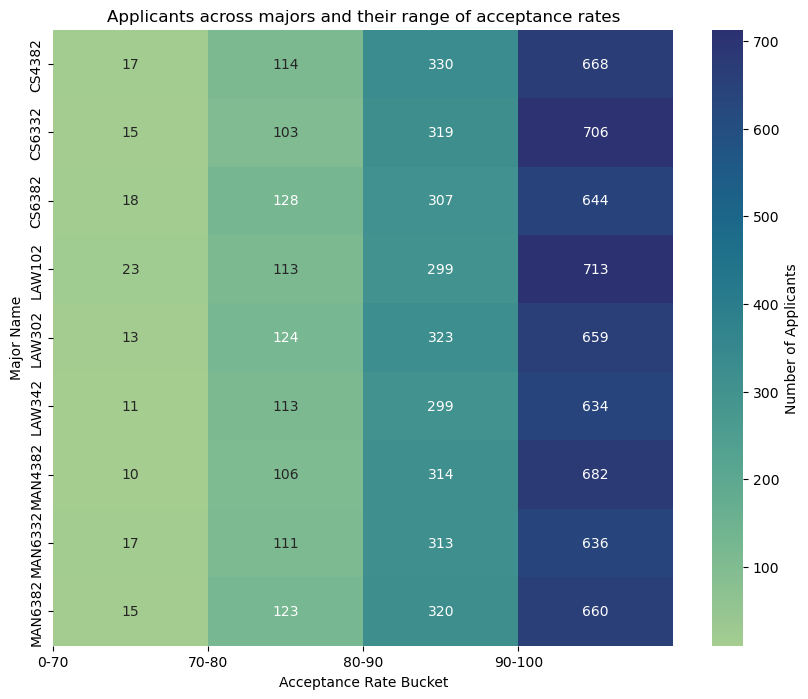

In [118]:
buckets = [0, 70, 80, 90, 100]
labels = ['0-70', '70-80', '80-90', '90-100']
school_data['acceptance_rate_bucket'] = pd.cut(school_data['acceptance_rate'], bins=buckets, labels=labels, right=True)
school_data['acceptance_rate_label'] = pd.Categorical(school_data['acceptance_rate_bucket']).codes
heatmap_data = school_data.pivot_table(index='name', columns='acceptance_rate_label', values='acceptance_rate', aggfunc='count')
plt.figure(figsize=(10, 8))
seaborn.heatmap(heatmap_data, annot=True, fmt='g', cmap='crest', cbar_kws={'label': 'Number of Applicants'})
plt.xlabel('Acceptance Rate Bucket')
plt.ylabel('Major Name')
plt.title('Applicants across majors and their range of acceptance rates')
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.show()

The heat map represents the distribution of applicants across majors and their range of acceptance rates where we can observe that for all of the majors around 60%,30%,10%,1% of the applicants have acceptance rates ranging from 90-100, 80-90, 70-80, <70 respectively. 

We can also observe that the highest, lowest number of applicants for majors with acceptance rate between 90-100 is 713,634 for LAW102, LAW342 respectively.
We can also observe that the highest, lowest number of applicants for majors with acceptance rate between 80-90 is 330,299 for CS4382, LAW102 and LAW342 respectively.
We can also observe that the highest, lowest number of applicants for majors with acceptance rate between 70-80 is 128,103 for CS6382, CS6332 respectively.
We can also observe that the highest, lowest number of applicants for majors with acceptance rate between 0-70 is 23,10 for LAW102, MAN4382 respectively.

# Conclusion 

Tuition Fees: Caltech has the highest average tuition, exceeding Wharton and Yale by 4%. This implies that there is not a major difference between the schools' tuition fee.

Ratings: Most majors have similar rating distributions, suggesting that student satisfaction is generally high across the board. However, LAW302 and CS4382 have wider ranges, indicating potential areas for improvement or further investigation.

Acceptance Rates: Acceptance rates fluctuate seasonally, suggesting potential factors like application volume, program competitiveness, or seasonal hiring trends. The median rate of 92% indicates overall competitiveness among applicants.

Tuition-Acceptance Relationship: Lower tuition fees appear to correlate with higher acceptance rates. This could be attributed to factors like program affordability, student demographics, or institutional financial aid policies.

Applicant Distribution: Law102 attracts the most applicants (11.5%) and Law342 the fewest (10.6%). This indicates that there's not much difference between the number of appilcants for each major.

Acceptance Rate Distribution: Across all majors, the majority of applicants (60%) have a high acceptance rate (90-100%), indicating strong competition for admission. However, a small percentage (1%) face lower acceptance rates, suggesting potential program selectivity or specific admission criteria.